# NLP Recommender System for Trip Advisor: Data Analysis and System Creation


## Table of Contents
---
- [Reading Data](#Reading-Data)
- [Data Cleaning](#Data-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
  - [Distributions](#Distributions)
  - [Correlations](#Correlations)
- [Data Visualization](#Data-Visualization)
- [Model Preparation](#Model-Preparation)
- [NLP System](#NLP-System)
  - [K-Means](#K-Means)
  - [DBSCAN](#DBSCAN)
  - [GMM](#GMM)
- [Dimensionality Reduction](#Dimensionality-Reduction)  
  - [PCA](#PCA)
- [Cluster Comparison and Analysis](#Cluster-Comparison-and-Analysis)
- [Discussion and Recommendations](#Discussion-and-Recommendations)

## Helper Functions

## Reading Data

We first import the necessary libraries necessary for data cleaning, modeling, and visualization.

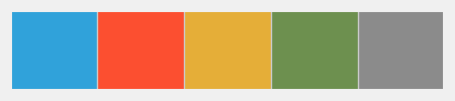

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
five_thirty_eight = [
    "#30a2da",
    "#fc4f30",
    "#e5ae38",
    "#6d904f",
    "#8b8b8b",
]
sns.set_palette(five_thirty_eight)
sns.palplot(sns.color_palette())
import plotly.graph_objects as go
import plotly.express as px

import re

Next, we pass inside our "things to do from Trip Advisor."

In [8]:
travel_df = pd.read_csv('all_things_to_do.csv')
print('There are {} rows and {} columns in our dataset.'.format(travel_df.shape[0],travel_df.shape[1]))

There are 19198 rows and 2 columns in our dataset.


In [9]:
travel_df.sample(10)

,Places,Place
7306,Boutique Maille,"Paris, France"
10764,Kitamihara Onsen,"Hokkaido, Japan"
7236,PICmyTRIP Paris,"Paris, France"
9883,Jimmen Rock,"Hokkaido, Japan"
2407,Preeti Rajawat,"Rajasthan, India"
4805,The Underground at The Mob Museum,"Las Vegas, Nevada"
16634,Muthu Tours Mirissa,"Sri Lanka, South Asia"
15702,LEONARDO CAMPOS DA CRUZ,"Bahai, Brazil"
18087,Tour Paradise Sri Lanka,"Sri Lanka, South Asia"
9541,Rausu Municipal Museum,"Hokkaido, Japan"


In [11]:
travel_df.describe()

,Places,Place
count,19198,19198
unique,18170,15
top,Etreker Travel,"Hokkaido, Japan"
freq,8,3120


We are can that there are `XXX` unique places at various locations. We will now clean our dataset.

## Data Cleaning
Let's first check for null values.

In [12]:
travel_df.isna().sum()

Places    0
Place     0
dtype: int64

There aren't any null values (as we scrapped valid destinations from Trip Advisor). However, we can see that there are a fair amount of locations with duplicated text. We will remove these.

In [19]:
travel_df = travel_df.drop_duplicates()

We then plot the associated cities and the amount of attractions in the respected cities.

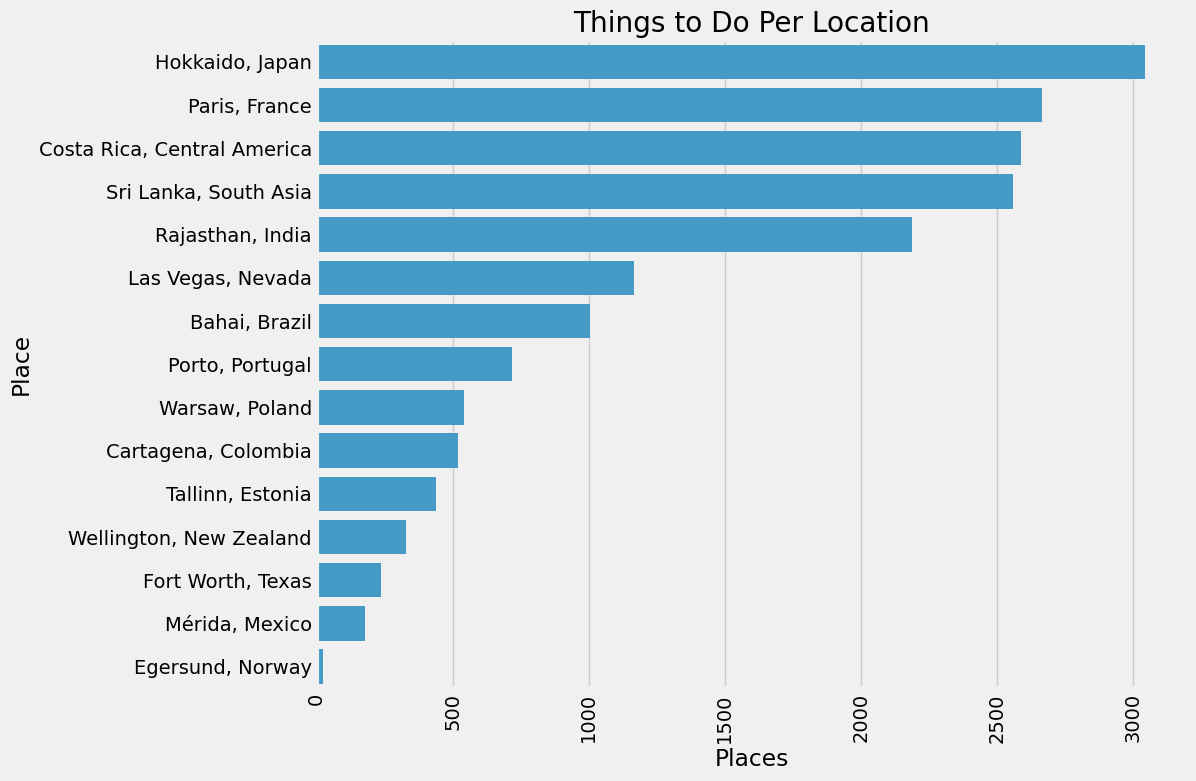

In [30]:
locations = travel_df.groupby('Place').count()

plt.figure(figsize=(10,8))
sorted_cities = locations.sort_values(by='Places', ascending=False)
sns.barplot(x='Places', y='Place', data=sorted_cities)
plt.title('Things to Do Per Location')
plt.xticks(rotation=90)
plt.show()

Next, we will clean the text.

In [34]:
def clean_text_column(df, column_name):
    # Ensure the specified column exists in the DataFrame
    if column_name not in df.columns:
        print(f"Column '{column_name}' not found in the DataFrame.")
        return

    # Function to clean text
    def clean_text(text):
        # Convert to lowercase, strip outer whitespace, replace punctuations with one space, and replace multiple spaces with a single space
        cleaned_text = re.sub(r'[^\w\s]', ' ', text.lower().strip())
        cleaned_text = re.sub(r'\s+', ' ', cleaned_text)

        return cleaned_text

    # Apply the cleaning function to the specified column
    df[column_name] = df[column_name].apply(clean_text)



# Apply the clean text function to the "Things to Do"
clean_text_column(travel_df, 'Places')


In [35]:
travel_df.head()

,Places,Place
0,walled city of cartagena,"Cartagena, Colombia"
1,castillo de san felipe de barajas,"Cartagena, Colombia"
2,caribe jewelry museum factory,"Cartagena, Colombia"
3,sanctuary of saint peter claver,"Cartagena, Colombia"
4,barrio getsemani,"Cartagena, Colombia"


In [37]:
!pip install nltk
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [38]:
from nltk.corpus import stopwords
import re
import string
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop_words_ = set(stopwords.words('english'))
wn = WordNetLemmatizer()

def black_txt(token):
    return  token not in stop_words_ and token not in list(string.punctuation)  and len(token)>2

def clean_txt(text):
  clean_text = []
  clean_text2 = []
  text = re.sub("'", "",text)
  text=re.sub("(\\d|\\W)+"," ",text)
  text = text.replace("nbsp", "")
  clean_text = [ wn.lemmatize(word, pos="v") for word in word_tokenize(text.lower()) if black_txt(word)]
  clean_text2 = [word for word in clean_text if black_txt(word)]
  return " ".join(clean_text2)

# Apply the clean text function to the "Things to Do"
clean_text_column(travel_df, 'Places')

In [39]:
travel_df.head()

,Places,Place
0,walled city of cartagena,"Cartagena, Colombia"
1,castillo de san felipe de barajas,"Cartagena, Colombia"
2,caribe jewelry museum factory,"Cartagena, Colombia"
3,sanctuary of saint peter claver,"Cartagena, Colombia"
4,barrio getsemani,"Cartagena, Colombia"


TF-IDF ( Term Frequency - Inverse Document Frequency )

In [ ]:
#initializing tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

tfidf_jobid = tfidf_vectorizer.fit_transform((df_all['Places'])) #fitting and transforming the vector
tfidf_jobid